## Pregunta 7


La forma analitica de las distancias es:

$$D_{A}(z) = \frac{f_{k}(\chi)}{1 + z} , \space D_{L} = (1+z) f_{k}(\chi)$$

donde:
$$ \chi(z) = \int_{0}^{z} \frac{dx}{E(x)} , \space E(z) = \frac{H(z)}{H_{0}}$$

La funcion de curvatura $f_{k}(\chi)$:


$$
f_{k}(\chi) = 
\begin{cases}
\dfrac{c}{H_{0}\sqrt{\Omega_{K,0}}}\;
\sinh\!\Big(\sqrt{\Omega_{K,0}}\;\chi\Big), & \Omega_{K,0} >0 \\
\dfrac{c}{H_{0}}\;\chi & \Omega_{K,0} = 0, \\
\dfrac{c}{H_{0}\sqrt{-\Omega_{K,0}}}\;
\sin\!\Big(\sqrt{-\Omega_{K,0}}\;\chi\Big), & \Omega_{K,0} < 0.

\end{cases}
$$
Con un componente de radiacion, materia, energia oscura (con ecuacion de estado w) y curvatura
$$
H^{2}(z) = H_{0}^{2} \left[ \Omega_{r,0}(1 +z )^{4} + \Omega_{m,0}(1 +z)^{3} + \Omega_{\Lambda,0}(1 +z)^{3(1+\omega)} + \Omega_{K,0}(1+z)^{2}\right]
$$

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


In [227]:
h0 = 67.4
c = 300000          #km/s
w = -1
# omega_k = 0
#omega_r = omega_r*(1 +z)**4 

In [235]:
def H2_z(z,omega_m, omega_lambda):
    if w==-1:
        return  (h0**2)*(omega_m*(1+z)**3 + (omega_k(omega_m, omega_lambda))*(1 +z)**2 + omega_lambda)
    else:
        return (h0**2)*(omega_m*(1+z)**3 + (omega_k(omega_m, omega_lambda))*(1 +z)**2 + omega_lambda*(1+z)**(3*(1+w)))

# def d_A(fk,z):
#     return fk/(1+z)

# def d_L(fk,z):
#     return (1 +z)*fk
def omega_k(omega_m, omega_lambda):
    return 1 - omega_m -omega_lambda

def E_z(z,  omega_m, omega_lambda):
    return np.sqrt(H2_z(z, omega_m, omega_lambda))/h0

def chi(z,omega_m, omega_lambda):

    dz = np.diff(z)[-1]
    return np.cumsum(dz/E_z(z, omega_m, omega_lambda))[-1]

# def chi(z, omega_m, omega_lambda):
#     # print(omega_m)
#     def integrand(z):
#         return  1.0 / E_z(z, omega_m, omega_lambda)
#     integral, _ = quad( integrand, z[0],z[-1])
#     return integral
def f_k(z, omega_m, omega_lambda):
    

    f = np.zeros(shape=(len(omega_m), len(omega_lambda)))
    # print(f)

    for i in range(len(omega_m)):
        for j in range(len(omega_lambda)):

            o_k = omega_k(omega_m[i], omega_lambda[j])
            # print(o_k)
            # print(o_k)

            if o_k < 0:
                term1 = c/(h0* np.sqrt(-o_k)) *np.sin(np.sqrt(-o_k)* chi(z,omega_m[i], omega_lambda[j]))
                # print('case 1')
            
            if o_k == 0:
                term1 = c/(h0) *chi(z,omega_m[i], omega_lambda[j])
                # print('case 2')
            
            if o_k > 0:
                term1 =  c/(h0* np.sqrt(o_k)) *np.sinh(np.sqrt(o_k)* chi(z,omega_m[i], omega_lambda[j]))
                # print('case 3')
    
            f[j,i]=  term1
            # print(term1)
            # print(f)
    
    return f

In [251]:
omega_m = np.linspace(-1, 3,100)
omega_lambda = np.linspace(-1,3, 100)

In [275]:
z = np.linspace(0.0001,30,100)
fk = f_k(z,omega_m, omega_lambda)

/var/folders/lp/pz0pr1y55xvbxt8nxcc4sl100000gn/T/ipykernel_2884/4125483880.py:16: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(H2_z(z, omega_m, omega_lambda))/h0


/var/folders/lp/pz0pr1y55xvbxt8nxcc4sl100000gn/T/ipykernel_2884/1343661611.py:2: RuntimeWarning: invalid value encountered in log10
  plt.contourf(omega_m, omega_lambda,np.log10(fk))


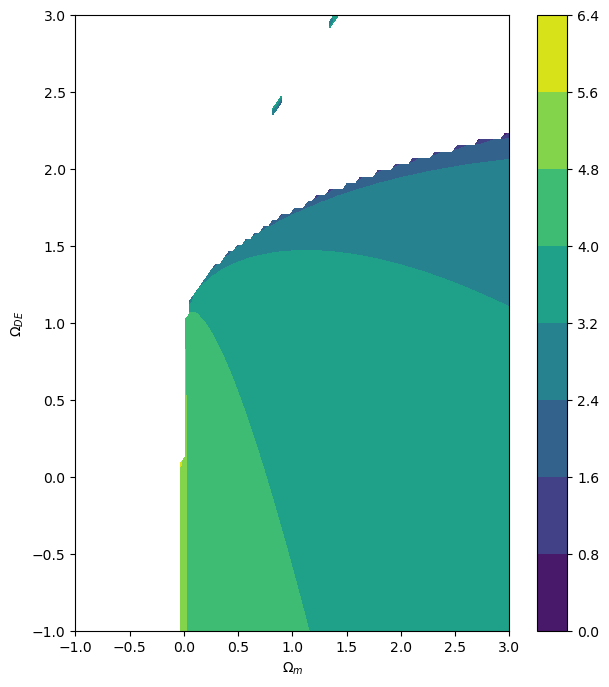

In [276]:
plt.figure(figsize=(7,8))
plt.contourf(omega_m, omega_lambda,np.log10(fk))
plt.colorbar()
plt.xlabel(r'$\Omega_{m}$')
plt.ylabel(r'$\Omega_{DE}$')
plt.show()
# plt.imshow(np.log10(fk), origin='lower')